In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
mcd = pd.read_csv('menu.csv')
display(mcd)
mcd.info()
mcd.describe()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [4]:
#hiLangkan koLom Category, Item, dan Serving Size untuk melakukan normaLisasi
mcd = mcd.drop(['Category', 'Item', 'Serving Size'], axis=1)
mcd.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


In [5]:
from sklearn import preprocessing

In [6]:
#meLakukan normaLisasi
mcd = preprocessing.StandardScaler().fit(mcd).transform(mcd.astype(float))
mcd[0:3]

array([[-0.28468361, -0.05559952, -0.0821929 , -0.08311032, -0.18971436,
        -0.18675333, -0.47593486,  2.35424457,  2.3628775 ,  0.44147095,
         0.43033103, -0.57969508, -0.61488307,  1.51417637,  1.66312459,
        -0.92309014,  0.32107066, -0.1409127 , -0.32457391,  0.23705644,
         0.83448094],
       [-0.49318428, -0.44735768, -0.43483572, -0.44935918, -0.56624669,
        -0.56286384, -0.47593486, -0.34376431, -0.35791541,  0.47619826,
         0.47201735, -0.61515878, -0.61488307,  1.51417637,  1.66312459,
        -0.92309014,  0.40875802, -0.30538992, -0.32457391,  0.23705644,
         0.0304813 ],
       [ 0.00721733,  0.57121352,  0.62309274,  0.6036063 ,  0.37508412,
         0.45263453, -0.47593486, -0.11414653, -0.11683249,  0.49356191,
         0.51370366, -0.65062248, -0.61488307,  1.51417637,  1.66312459,
        -0.95802514,  0.05800856, -0.22315131, -0.32457391,  0.23705644,
         0.26019549]])

In [7]:
menu = pd.read_csv('menu.csv')
mcd = pd.DataFrame (menu)

In [8]:
#visuaLisasi
mcd['Calories'].value_counts(ascending=True)

810      1
720      1
930      1
590      1
1050     1
        ..
250      8
280      9
340     10
430     10
0       16
Name: Calories, Length: 78, dtype: int64

In [9]:
#meLihat data barchart (visuaLisasi data)
cdf = mcd[['Calories','Carbohydrates','Cholesterol','Sodium']]
cdf.head(9)

,Calories,Carbohydrates,Cholesterol,Sodium
0,300,31,260,750
1,250,30,25,770
2,370,29,45,780
3,450,30,285,860
4,400,30,50,880
5,430,31,300,960
6,460,38,250,1300
7,520,43,250,1410
8,410,36,35,1300


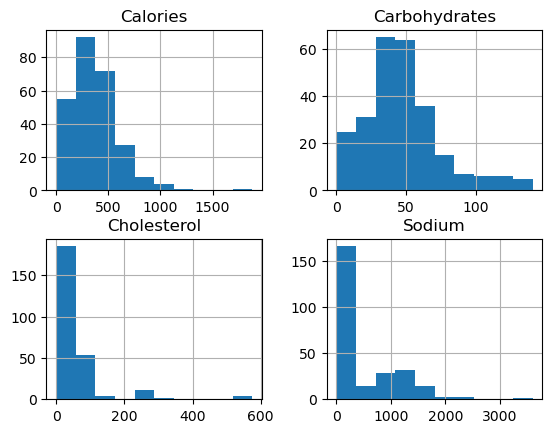

In [10]:
#meLihat data barchart (visuaLisasi data)
viz = cdf[['Calories','Carbohydrates','Cholesterol','Sodium']]
viz.hist()
plt.show()

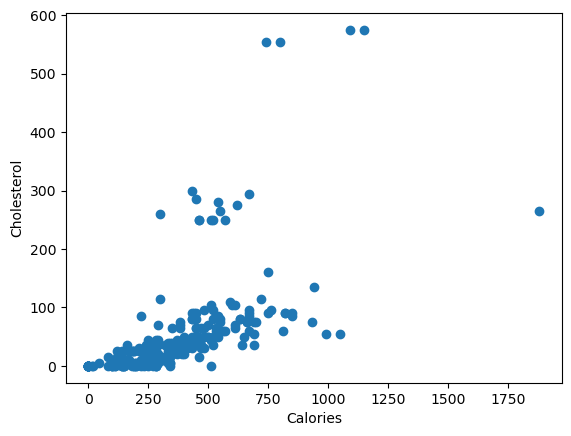

In [11]:
#data 1 koreLasi 2 variabeL (visuaLisasi data)
plt.scatter(cdf.Calories , cdf.Cholesterol )
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.show()

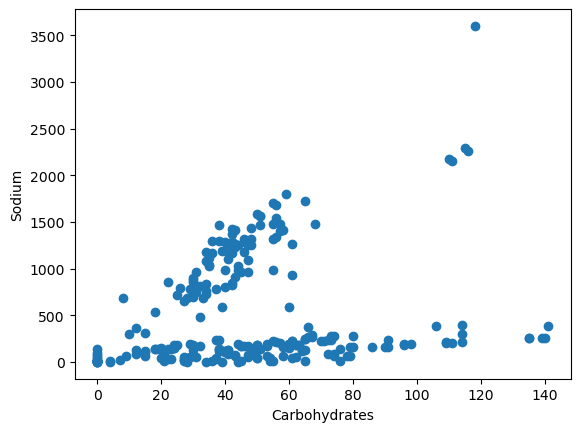

In [12]:
#data 2 koreLasi 2 variabeL (visuaLisasi data)
plt.scatter(cdf.Carbohydrates , cdf.Sodium)
plt.xlabel('Carbohydrates')
plt.ylabel('Sodium')
plt.show()

In [13]:
#data training
msk = np.random.rand(len(mcd)) < 0.8
train = cdf[msk]
test = cdf[~msk]

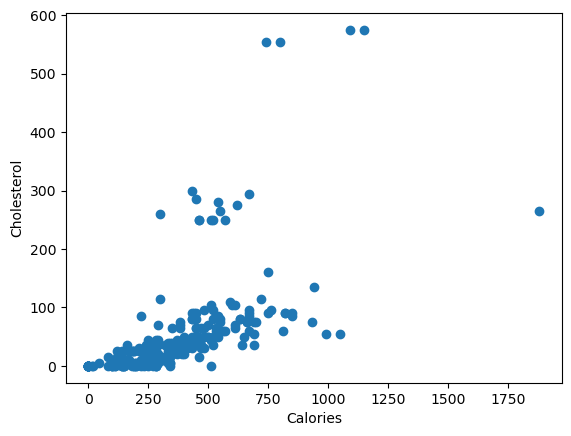

In [19]:
#traindata distribution
plt.scatter(cdf.Calories , cdf.Cholesterol)
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.show()

In [15]:
#modeLing dari train
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Calories']])
train_y = np.asanyarray(train[['Cholesterol']])
regr.fit (train_x, train_y)

#the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[0.20991408]]
Intercept:  [-22.80020468]


In [16]:
#hasiL evaLuasi dengan menggunakan metric dan hasiLnya

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Calories']])
test_y = np.asanyarray(test[['Cholesterol']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("MSE : %.2F" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score : %.2F" % r2_score(test_y_hat, test_y))


Mean absolute error: 49.94
MSE : 9721.69
R2-score : -3.41


Text(0, 0.5, 'Cholesterol')

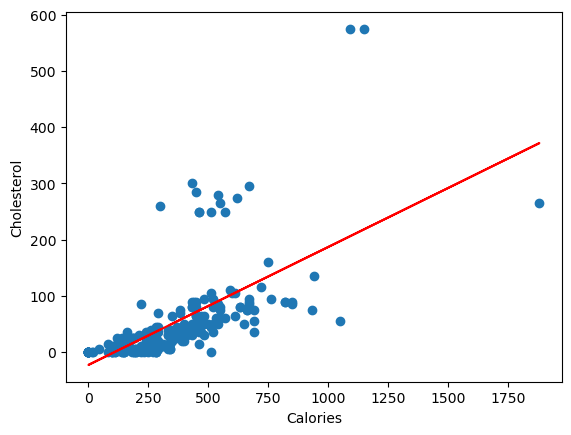

In [17]:
#prediksi dari modeL yang sudah di train
plt.scatter(train.Calories, train.Cholesterol)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Calories")
plt.ylabel("Cholesterol")